In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pune-restaurants-zomato/zomato_outlet_final.csv


**Loading the dataset:**

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("/kaggle/input/pune-restaurants-zomato/zomato_outlet_final.csv")

**Cleaning and Preprocessing**

In [4]:
data.sample(10)

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
1231,https://www.zomato.com/pune/satgurus-punjabi-r...,Satguru's Punjabi Rasoi\r\n ...,Casual Dining,Kharadi,4.0,"(1,162)",3.5,(20.1K),"Chinese,Mughlai,North Indian,","Rs. 1,000","Lassi, Dal Makhani, Thali, Butter Chicken, Par..."
4879,https://www.zomato.com/pune/the-northern-front...,The Northern Frontier\r\n ...,"Casual Dining,Bar",Yerawada,4.2,(843),4.1,"(3,679)","Seafood,Mughlai,North Indian,Kashmiri,","Rs. 1,100","Dal Makhani, Butter Chicken, Biryani, Mutton R..."
4761,https://www.zomato.com/pune/jumboking-3-chinchwad,Jumboking\r\n,Quick Bites,Chinchwad,3.3,(8 Reviews),NaN,NaN,"Fast Food,Burger,",Rs. 250,NaN
2676,https://www.zomato.com/pune/thank-god-for-pizz...,Thank God For Pizzas\r\n ...,Quick Bites,Nigdi,4.1,(520),3.5,"(5,125)","Fast Food,Pizza,",Rs. 550,"Garlic Bread, Chicken Popcorn, Pasta, Thin Cru..."
569,https://www.zomato.com/pune/fulora-punjabi-by-...,Fulora Punjabi By Nature\r\r\n ...,Casual Dining,Bibvewadi,3.4,(50 Reviews),NaN,NaN,"Chinese,North Indian,","Rs. 1,200",NaN
3900,https://www.zomato.com/pune/guru-sawantss-malw...,Guru Sawants's Malwan Katta\r\n ...,Quick Bites,Karve Nagar,4.2,(138 Reviews),NaN,NaN,"Malwani,",Rs. 500,"Fish, Sea Food, Surmai Thali, Bangda Fry, Kola..."
5327,https://www.zomato.com/pune/uttam-sweets-sinhg...,Uttam Sweets\r\n ...,Sweet Shop,Sinhgad Road,3.9,"(1,220 Reviews)",NaN,NaN,"Street Food,Mithai,",Rs. 100,NaN
4685,https://www.zomato.com/pune/the-bento-company-...,The Bento Company\r\n ...,Casual Dining,"City Hub @ WTC, Kharadi",3.5,(77),3.9,(101),"Japanese,",Rs. 800,"Sushi, Noodle, Bento Box, Teriyaki Chicken Ben..."
3585,https://www.zomato.com/pune/kekiz-the-cake-sho...,Kekiz The Cake Shop\r\n ...,Bakery,Kothrud,NaN,NaN,NaN,NaN,"Desserts,Bakery,",Rs. 300,NaN
2848,https://www.zomato.com/pune/sweet-truth-pimple...,Sweet Truth\r\n ...,NaN,Pimple Gurav,3.9,(624 Reviews),NaN,NaN,"Ice Cream,Desserts,Bakery,",Rs. 300,"Chocolate Decadence, Cheesecake, Chocolate Fan..."


In [5]:
data.shape

(5433, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5433 non-null   object 
 1   rest_name         5433 non-null   object 
 2   rest_type         4336 non-null   object 
 3   loc               5433 non-null   object 
 4   dine_rating       4829 non-null   float64
 5   dine_reviews      4829 non-null   object 
 6   delivery_rating   2539 non-null   float64
 7   delivery_reviews  2539 non-null   object 
 8   cuisine           5433 non-null   object 
 9   cost              5433 non-null   object 
 10  liked             2603 non-null   object 
dtypes: float64(2), object(9)
memory usage: 467.0+ KB


In [7]:
#dropping the first attribute link
data=data.drop(['link'],axis=1)

In [8]:
data.sample()

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
3213,KNS\r\n,Quick Bites,Pimple Gurav,3.6,(54),4.0,(540),"Pizza,Fast Food,",Rs. 300,NaN


In [9]:
data['rest_name']

0       Mix@36 - The Westin\r\r\n                     ...
1       Kangan - The Westin\r\r\n                     ...
2       Coriander Kitchen - Conrad Pune\r\r\n         ...
3       The Market - The Westin\r\r\n                 ...
4       Vandaag - Vivanta Pune\r\r\n                  ...
                              ...                        
5428    Murli Pure Veg\r\n                            ...
5429    The Irani Cafe Restaurant\r\n                 ...
5430    Hotel Shilpa Gavran\r\n                       ...
5431    MH 12 Pav Bhaji & Juice Center\r\n            ...
5432    Liyo China\r\n                                ...
Name: rest_name, Length: 5433, dtype: object

In [10]:
#cleaning the rest_name attribute
def namehandle(value):
    if '\r\r\n                                    ' in value:
        value = value.replace('\r\r\n                                    ', '')
    if '\r\n                                    ' in value:
        value = value.replace('\r\n                                    ', '')
    else:
        return value
data['rest_name'] = data['rest_name'].apply(namehandle)
data['rest_name'].unique()

array(['Mix@36 - The Westin', 'Kangan - The Westin',
       'Coriander Kitchen - Conrad Pune', 'The Market - The Westin',
       'Vandaag - Vivanta Pune', 'Baan Tao - Hyatt Pune',
       'Zeera - Conrad Pune', 'Koji - Conrad Pune',
       'Feast - Sheraton Grand', 'Aasmana: The Ritz-Carlton',
       'Kabana - Conrad Pune', 'Masu - Conrad Pune',
       'Level 12 - DoubleTree By Hilton Hotel', 'Kitsch - The O Hotel',
       'Roof Top Bar - Sheraton Grand',
       'Connexions Lounge & Bar - Ramada Plaza',
       'Asian Harbour - Vivanta Pune',
       'Oak Lounge - Marriott Suites Pune',
       'The Cafè - Hyatt Regency Pune', 'Eighty Eight - Hyatt Pune',
       'Easy - Blue Diamond', 'Paasha - JW Marriott Pune',
       'Evviva Sky Lounge - Crowne Plaza Pune City Centre',
       'Mosaic - Crowne Plaza Pune City Centre',
       'Ukiyo: The Ritz-Carlton', 'Mi-a-Mi - JW Marriott Pune',
       'TGI Fridays', 'Chingari - Sheraton Grand',
       'The House Of Medici - The Westin',
       'Whispe

In [11]:
#extracting the integers only
def clean_data(cols, str_to_replace):           
    for col in cols:
        data[col] = [str(x).replace(str_to_replace,"") for x in data[col]]       
    return data
def extract_digit(cols):
    for col in cols:
        data[col] = data[col].str.extract(r'(\d+)', expand=True)
    return data
data = clean_data(['cost', 'dine_reviews'], ",")
data = extract_digit(['cost', 'dine_reviews'])

In [12]:
def convert_cols(cols):
    for col in cols:
        data[col] = data[col].astype(float)   
    return data
data = convert_cols(['dine_reviews','cost'])

In [13]:
data.head(3)

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,Mix@36 - The Westin,Lounge,"The Westin, Mundhwa",4.2,707.0,NaN,NaN,"North Indian,Continental,Asian,Finger Food,",4300.0,"Cocktails, Chaat, Beer"
1,Kangan - The Westin,Fine Dining,"The Westin, Mundhwa",4.1,344.0,NaN,NaN,"North Indian,Mughlai,",3500.0,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,NaN,NaN,"Mediterranean,Asian,North Indian,",3200.0,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."


In [14]:
#Checking for duplicates:
data.drop_duplicates()

,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,Mix@36 - The Westin,Lounge,"The Westin, Mundhwa",4.2,707.0,NaN,NaN,"North Indian,Continental,Asian,Finger Food,",4300.0,"Cocktails, Chaat, Beer"
1,Kangan - The Westin,Fine Dining,"The Westin, Mundhwa",4.1,344.0,NaN,NaN,"North Indian,Mughlai,",3500.0,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,NaN,NaN,"Mediterranean,Asian,North Indian,",3200.0,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,The Market - The Westin,Fine Dining,"The Westin, Mundhwa",4.0,55.0,NaN,NaN,"Asian,European,North Indian,",3200.0,"Vanilla Ice Cream, Chaat, Sushi"
4,Vandaag - Vivanta Pune,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,NaN,NaN,"Finger Food,Continental,",3100.0,"Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."
...,...,...,...,...,...,...,...,...,...,...
5428,None,Casual Dining,Sinhgad Road,3.1,22.0,3.5,(253),"South Indian,Chinese,North Indian,",550.0,NaN
5429,None,Casual Dining,Viman Nagar,2.9,80.0,NaN,NaN,"Mughlai,Iranian,",800.0,"Naan, Mutton Keema, Dum Biryani, Irani Chai, B..."
5430,None,Casual Dining,Pimpri,3.8,90.0,NaN,NaN,"Chinese,Fast Food,North Indian,",500.0,"Mutton Thali, Chicken Sukha"
5431,None,Quick Bites,Sadashiv Peth,3.1,24.0,3.1,(439),"Beverages,Chinese,Street Food,Fast Food,",250.0,NaN


**EDA**

In [15]:
#importing the libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Number of outlets')

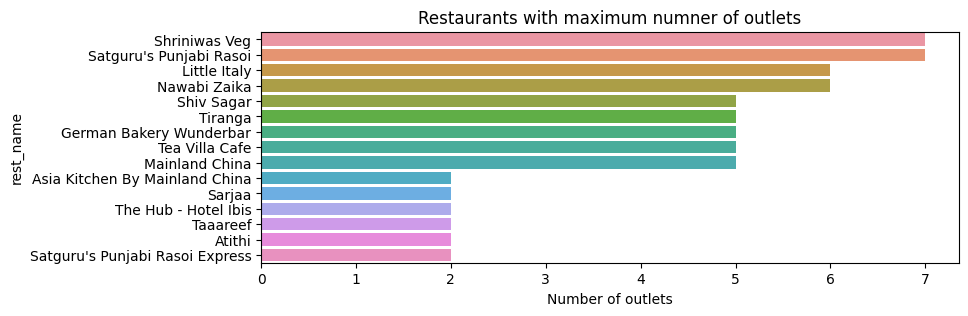

In [16]:
plt.figure(figsize=(9,3))
chains=data['rest_name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index.str.rstrip())
plt.title("Restaurants with maximum numner of outlets")
plt.xlabel("Number of outlets")

**INFERENCE:
Shriniwas Veg and Satguru's Punjabi Rasoi has the highest number of outlets(7) according to this dataset.**

In [17]:
#top 5 locations:
loc_count = data['loc'].value_counts() 
loc_count = loc_count.sort_values(ascending=False, axis=0)
loc_count=loc_count.head()
loc_count = loc_count.sort_values(ascending=False, axis=0)
loc_count

loc
Kothrud        273
Viman Nagar    241
Wakad          235
Baner          234
Hinjawadi      225
Name: count, dtype: int64

**INFERENCE:
Kothrud is the city with more number of restaurants**

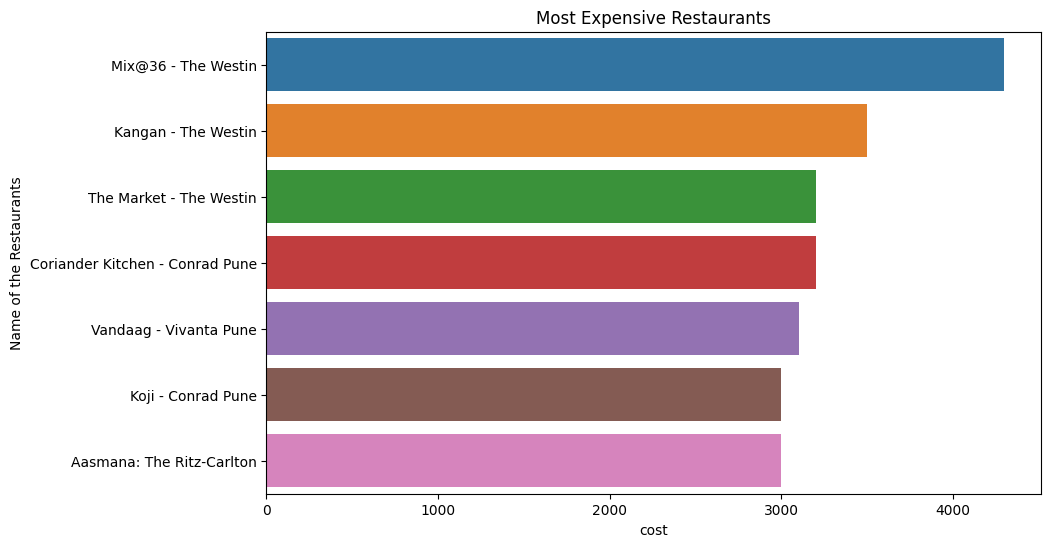

In [18]:
def bar_plot(col, title):
    c = data[['rest_name', col]].sort_values(by=col, ascending=False)[:10]
    plt.figure(figsize=(10, 6))
    g = sns.barplot(x=c[col], y=c['rest_name'].str.rstrip())
    plt.title(title)
    plt.ylabel('Name of the Restaurants')
    plt.show()
bar_plot('cost',"Most Expensive Restaurants")

**Inference:
  The Westin, Mundhwa location has the most expensive restaurants**

/tmp/ipykernel_18/1053598383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cost'],ax=ax)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Cost Distrubution for all restaurants')

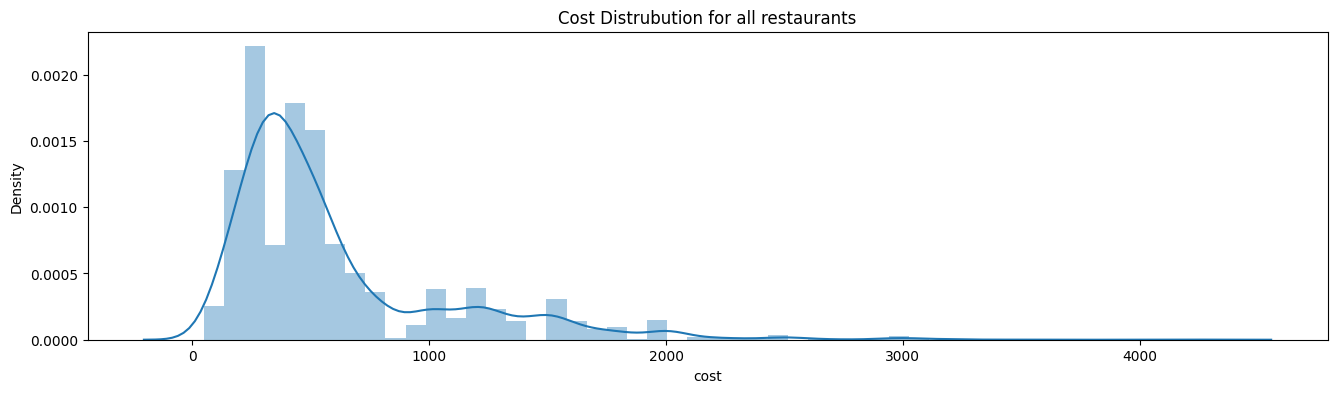

In [19]:
#'Cost Distribution'
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(data['cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

**INFERENCE:
Most of the restaurants are budget friendly in Pune**

Text(0, 0.5, 'count')

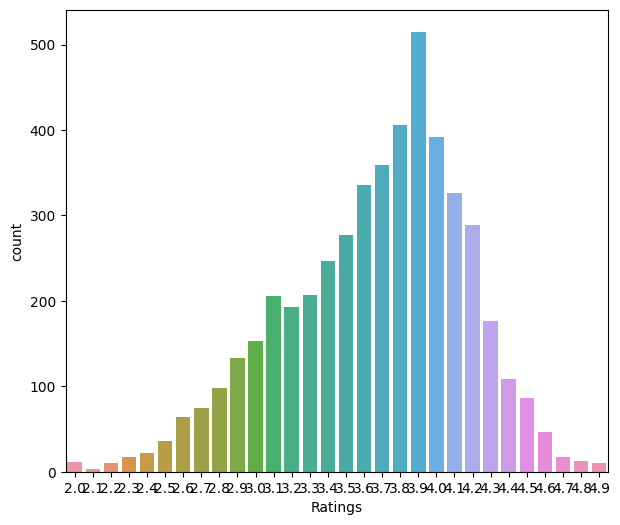

In [20]:
#Rating Distribution
plt.figure(figsize=(7,6))
rating=data['dine_rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

**Inference:
More than 50% restaurants have rating between 3.5 and 4**

In [21]:
cheapbest=data[['cost', 'loc','rest_type','cuisine', 'dine_rating','dine_reviews']]
cheapbest=data[(data['cost']<1000) & (data['dine_rating']>4.3) & (data['dine_reviews']>4000)]
cheapbest['loc']

772             FC Road
965     Deccan Gymkhana
1304          Erandwane
1380    Deccan Gymkhana
2420              Aundh
Name: loc, dtype: object

**Inference:
In Pune Cheap and best food are found in Deccan Gymkhana**

Text(0.5, 0, 'Number of restaurants')

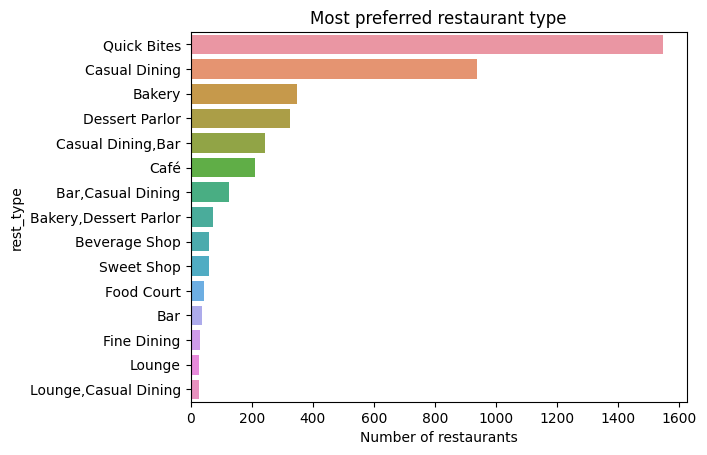

In [22]:
r_type =data['rest_type'].value_counts()[:15]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Most preferred restaurant type")
plt.xlabel("Number of restaurants")

**INFERENCE:
Quick bites is preferred by most people in Pune**

In [23]:
data['rest_name'].unique()

array(['Mix@36 - The Westin', 'Kangan - The Westin',
       'Coriander Kitchen - Conrad Pune', 'The Market - The Westin',
       'Vandaag - Vivanta Pune', 'Baan Tao - Hyatt Pune',
       'Zeera - Conrad Pune', 'Koji - Conrad Pune',
       'Feast - Sheraton Grand', 'Aasmana: The Ritz-Carlton',
       'Kabana - Conrad Pune', 'Masu - Conrad Pune',
       'Level 12 - DoubleTree By Hilton Hotel', 'Kitsch - The O Hotel',
       'Roof Top Bar - Sheraton Grand',
       'Connexions Lounge & Bar - Ramada Plaza',
       'Asian Harbour - Vivanta Pune',
       'Oak Lounge - Marriott Suites Pune',
       'The Cafè - Hyatt Regency Pune', 'Eighty Eight - Hyatt Pune',
       'Easy - Blue Diamond', 'Paasha - JW Marriott Pune',
       'Evviva Sky Lounge - Crowne Plaza Pune City Centre',
       'Mosaic - Crowne Plaza Pune City Centre',
       'Ukiyo: The Ritz-Carlton', 'Mi-a-Mi - JW Marriott Pune',
       'TGI Fridays', 'Chingari - Sheraton Grand',
       'The House Of Medici - The Westin',
       'Whispe

In [24]:
data['rest_name'].nunique()

720

**Inference: This data is uploaded in Kaggle at 2020, so at that time there were around 720 restaurants available in Pune**

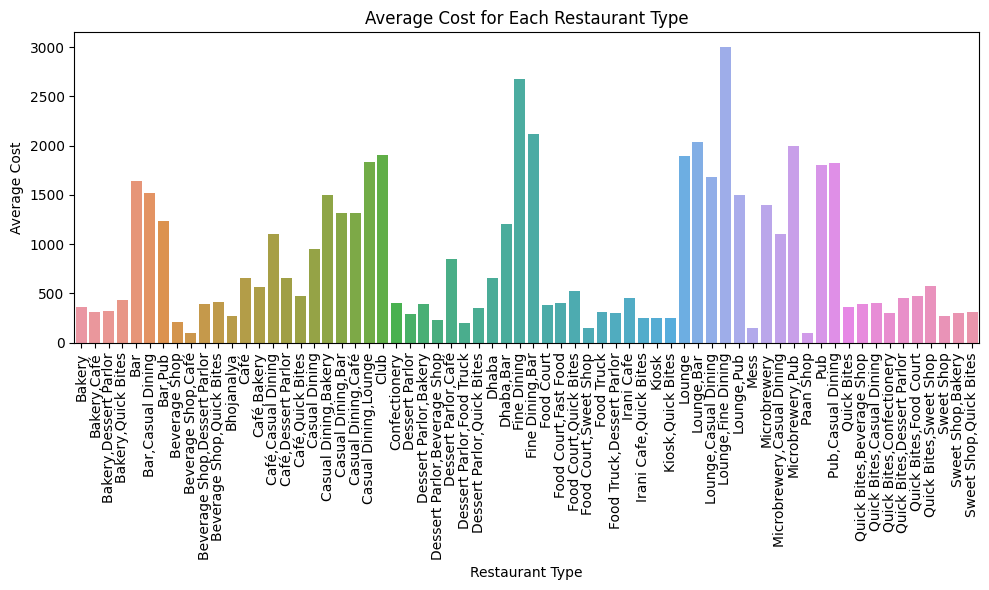

In [25]:
avg_cost = data.groupby('rest_type')['cost'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='rest_type', y='cost', data=avg_cost)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost')
plt.title('Average Cost for Each Restaurant Type')
plt.tight_layout()
plt.show()

**Inference: The Fine Dining Restaurant types makes more money in average**

In [26]:
data['liked']

0                                  Cocktails, Chaat, Beer
1       Biryani, Veg Platter, Dal Makhani, Butter Chic...
2       Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,...
3                         Vanilla Ice Cream, Chaat, Sushi
4       Cocktails, Beer, Peri Peri Chicken, Fish, Veg ...
                              ...                        
5428                                                  NaN
5429    Naan, Mutton Keema, Dum Biryani, Irani Chai, B...
5430                          Mutton Thali, Chicken Sukha
5431                                                  NaN
5432                                               Noodle
Name: liked, Length: 5433, dtype: object

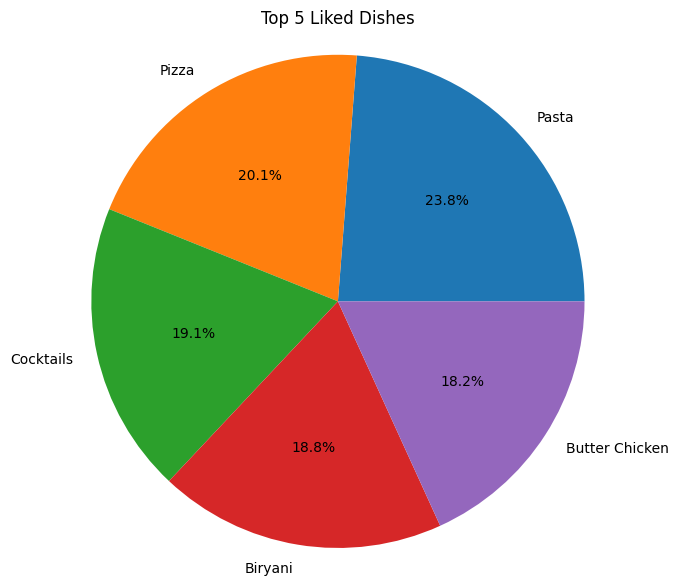

In [27]:
from collections import Counter
liked_dishes_list = data['liked'].dropna().str.split(',').tolist()
flattened_liked_dishes = [dish.strip() for sublist in liked_dishes_list for dish in sublist]
dish_counts = Counter(flattened_liked_dishes)
top_5_liked_dishes = dict(dish_counts.most_common(5))
plt.figure(figsize=(7, 7))
plt.pie(top_5_liked_dishes.values(), labels=top_5_liked_dishes.keys(), autopct='%1.1f%%', startangle=0)
plt.title('Top 5 Liked Dishes')
plt.axis('equal')
plt.show()

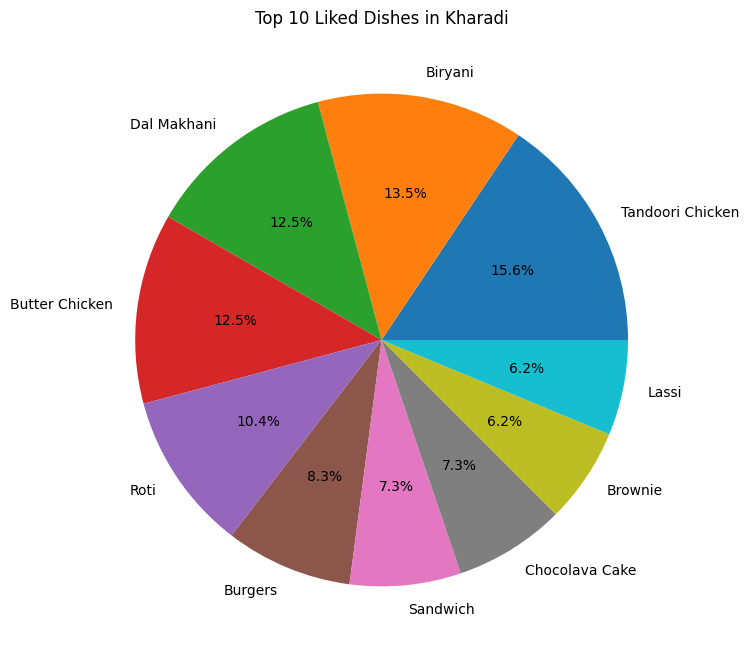

In [28]:
kharadi_data = data[data['loc'] == 'Kharadi']
liked_dishes_list = kharadi_data['liked'].dropna().str.split(',').tolist()
flattened_liked_dishes = [dish.strip() for sublist in liked_dishes_list for dish in sublist]
dish_counts = Counter(flattened_liked_dishes)
top_5_liked_dishes = dict(dish_counts.most_common(10))
plt.figure(figsize=(8, 8))
plt.pie(top_5_liked_dishes.values(), labels=top_5_liked_dishes.keys(), autopct='%1.1f%%')
plt.title('Top 10 Liked Dishes in Kharadi')
plt.show()

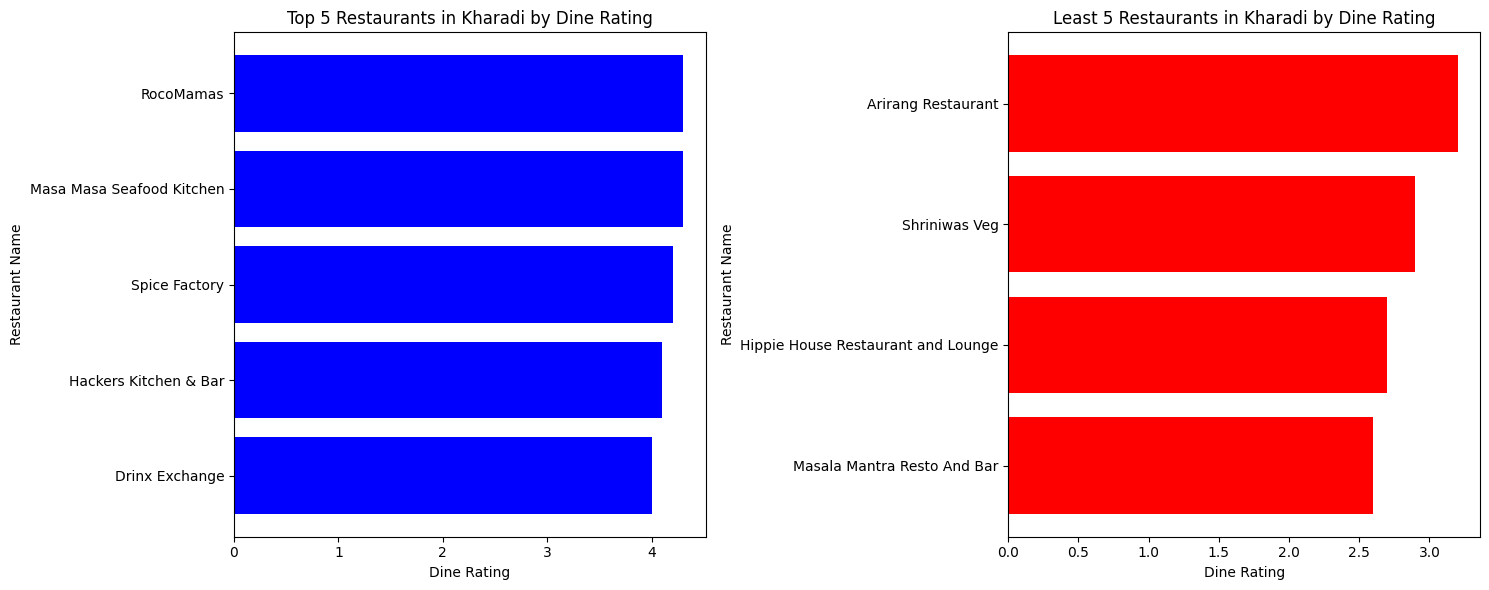

In [29]:
kharadi_data_filtered = kharadi_data[kharadi_data['rest_name'].notna()]
sorted_kharadi_data = kharadi_data_filtered.sort_values(by='dine_rating', ascending=False)
top_5_restaurants = sorted_kharadi_data.head(5)
least_5_restaurants = sorted_kharadi_data.tail(5)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].barh(top_5_restaurants['rest_name'], top_5_restaurants['dine_rating'], color='blue')
axes[0].set_xlabel('Dine Rating')
axes[0].set_ylabel('Restaurant Name')
axes[0].set_title('Top 5 Restaurants in Kharadi by Dine Rating')
axes[0].invert_yaxis()  
axes[1].barh(least_5_restaurants['rest_name'], least_5_restaurants['dine_rating'], color='red')
axes[1].set_xlabel('Dine Rating')
axes[1].set_ylabel('Restaurant Name')
axes[1].set_title('Least 5 Restaurants in Kharadi by Dine Rating')
axes[1].invert_yaxis()
plt.tight_layout() 
plt.show()

In [30]:
data['cuisine']

0       North Indian,Continental,Asian,Finger Food,
1                             North Indian,Mughlai,
2                 Mediterranean,Asian,North Indian,
3                      Asian,European,North Indian,
4                          Finger Food,Continental,
                           ...                     
5428             South Indian,Chinese,North Indian,
5429                               Mughlai,Iranian,
5430                Chinese,Fast Food,North Indian,
5431       Beverages,Chinese,Street Food,Fast Food,
5432                                  Thai,Chinese,
Name: cuisine, Length: 5433, dtype: object

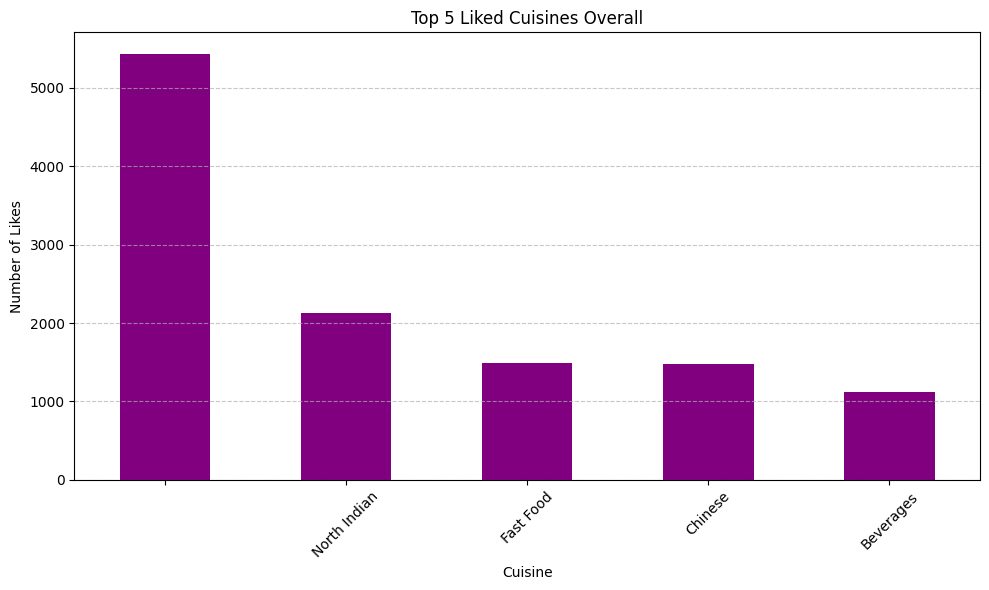

In [31]:
cuisine_data = data['cuisine']
cuisine_list = cuisine_data.str.split(',')
flat_cuisine_list = [cuisine.strip() for sublist in cuisine_list for cuisine in sublist]
cuisine_counts = pd.Series(flat_cuisine_list).value_counts()
top_5_cuisines = cuisine_counts.head(5)
# Plotting
plt.figure(figsize=(10, 6))
top_5_cuisines.plot(kind='bar', color='purple')
plt.xlabel('Cuisine')
plt.ylabel('Number of Likes')
plt.title('Top 5 Liked Cuisines Overall')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


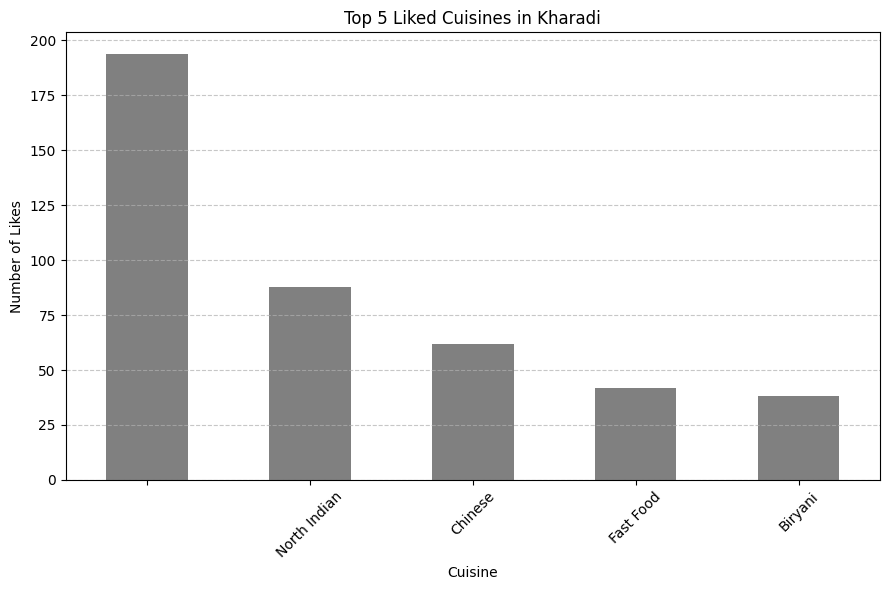

In [32]:
kharadi_data = data[data['loc'] == 'Kharadi']
cuisine_data_kharadi = kharadi_data['cuisine']
cuisine_list_kharadi = cuisine_data_kharadi.str.split(',')
flat_cuisine_list_kharadi = [cuisine.strip() for sublist in cuisine_list_kharadi for cuisine in sublist]
cuisine_counts_kharadi = pd.Series(flat_cuisine_list_kharadi).value_counts()
top_5_cuisines_kharadi = cuisine_counts_kharadi.head(5)
plt.figure(figsize=(9, 6))
top_5_cuisines_kharadi.plot(kind='bar', color='grey')
plt.xlabel('Cuisine')
plt.ylabel('Number of Likes')
plt.title('Top 5 Liked Cuisines in Kharadi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
cheapbest=data[['cost', 'loc','rest_type','cuisine', 'dine_rating','dine_reviews']]
cheapbest=data[(data['cost']<1500) & (data['dine_rating']>4.0)  & (data['loc']=='Kharadi')]
cheapbest['rest_name'].head(2)

419    Masa Masa Seafood Kitchen
468                    RocoMamas
Name: rest_name, dtype: object

**INFERENCE**
**The affordable and the good food in Kharadi is in Masa Masa Seafood Kitchen and RocoMamas**

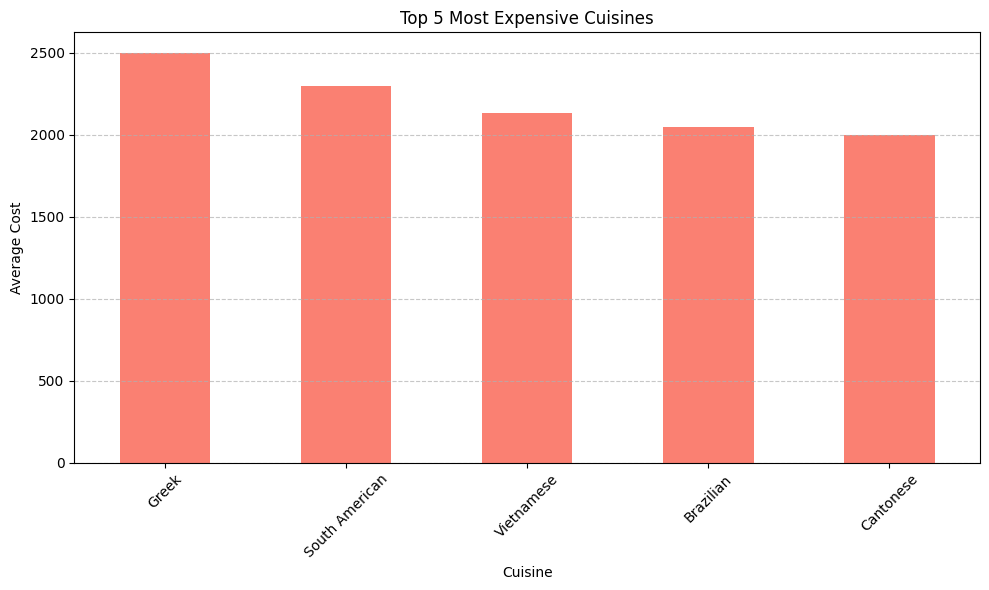

In [34]:
cuisine_cost_data = data[['cuisine', 'cost']]
cuisine_list = cuisine_cost_data['cuisine'].str.split(',')
expanded_data = cuisine_cost_data.loc[cuisine_cost_data.index.repeat(cuisine_list.str.len())]
expanded_data['flattened_cuisine'] = [cuisine.strip() for sublist in cuisine_list for cuisine in sublist]
# Calculate the average cost for each cuisine
average_cost_per_cuisine = expanded_data.groupby('flattened_cuisine')['cost'].mean()
top_5_expensive_cuisines = average_cost_per_cuisine.nlargest(5)
# Plotting
plt.figure(figsize=(10, 6))
top_5_expensive_cuisines.plot(kind='bar', color='salmon')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost')
plt.title('Top 5 Most Expensive Cuisines')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()